In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
#plt.style.use('dark_background')
#sns.set_style("ticks")
#sns.set_style("whitegrid")
#sns.set(font_scale=1.2)
#palette_beach = ["#eda37e", "#e3bbf7","#f5e79e", "#f9bfd5", "#9bbef5"]
#sns.set_palette(sns.color_palette(palette_beach))
%config InlineBackend.figure_format = 'png' # (svg)

plt.style.use('seaborn')
sns.set(context="paper")
sns.set(font_scale=1.3)
save_path = "/home/asa/Documents/github-repos/thesis/sigmod-2022-submission/figures/misc/"

# Image Dataset Storage Consumption Plot

In [2]:
# storage consumption is in GB (+ metadata)

caltech_101 = [2003, 9146,  0.13, "Caltech 101"] # 138,6 MB / 1024 = 0.13
caltech_256 = [2007, 30607, 1.5, "Caltech 256"] # 1.5GB 
cifar_10    = [2009, 60000, 0.18, "CIFAR-10"] # 186,2 MB / 1024 = 0.18
pascal_voc_2009 = [2009,  14743, 0.9, "Pascal VOC 2009"] # 920,5 MB / 1024 = 0.898 = 0.9 (http://host.robots.ox.ac.uk/pascal/VOC/voc2009/devkit_doc_14-May-2009.pdf)
pascal_voc_2012 = [2012, 15000, 2.0, "Pascal VOC 2012"] # 2GB
imagenet  = [2009, 3200000, 1341.44, "ImageNet"] # 1.31 TB * 1024 = 1341.44 GB
tinyimage = [2008, 80000000, 398, "TinyImage"] # 760GB (paper), but real
# Image binary (227Gb), Metadata binary (57Gb), Gist binary (114Gb) = 227 + 171 = 398
ms_coco = [2017, 328000, 46.14, "MS COCO"]
# 18GB + 1GB + 6GB + 19GB + 241MB + 1.1GB + 821MB + 5MB = 45.1 GB + 1067 MB = 45.1GB + 1.04 GB = 46.14 GB
openimages_v6 = [2020, 9000000, 18432, "OpenImages V6"] # 18TB * 1024 = 18432

combined_list = []
combined_list.append(caltech_101)
combined_list.append(caltech_256)
combined_list.append(cifar_10)
combined_list.append(pascal_voc_2009)
combined_list.append(imagenet)
combined_list.append(tinyimage)
combined_list.append(pascal_voc_2012)
combined_list.append(ms_coco)
combined_list.append(openimages_v6)
combined_np = np.array(combined_list)

storage_consumption_df = pd.DataFrame(data=combined_np, \
            index=[i for i in range(combined_np.shape[0])], \
            columns=list(["year", "imagecount", "size-gb", "name"]))
for col_name in storage_consumption_df.columns.values[:3]:
    storage_consumption_df[col_name] = pd.to_numeric(storage_consumption_df[col_name])
storage_consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        9 non-null      int64  
 1   imagecount  9 non-null      int64  
 2   size-gb     9 non-null      float64
 3   name        9 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 360.0+ bytes


In [3]:
storage_consumption_df["imagecount"] = np.log10(storage_consumption_df["imagecount"])
storage_consumption_df["size-gb"] = np.log10(storage_consumption_df["size-gb"])
storage_consumption_df

,year,imagecount,size-gb,name
0,2003,3.961231,-0.886057,Caltech 101
1,2007,4.485821,0.176091,Caltech 256
2,2009,4.778151,-0.744727,CIFAR-10
3,2009,4.168586,-0.045757,Pascal VOC 2009
4,2009,6.505150,3.127571,ImageNet
5,2008,7.903090,2.599883,TinyImage
6,2012,4.176091,0.301030,Pascal VOC 2012
7,2017,5.515874,1.664078,MS COCO
8,2020,6.954243,4.265572,OpenImages V6


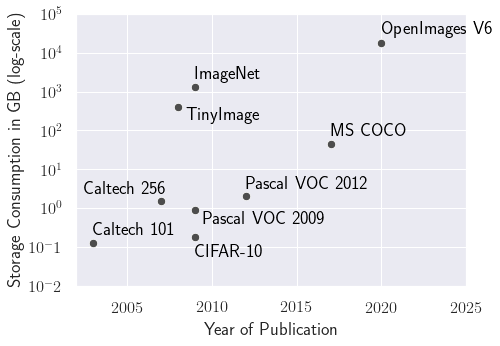

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
title = '' #'Image Datasets'
xlabel = 'Year of Publication'
ylabel = 'Storage Consumption in GB (log-scale)'

x = "year"
y = "size-gb"
name = "name"
df = storage_consumption_df
# Create the scatter plot
plot = sns.scatterplot(x, y, data=df, color="0.3", s=70, legend=False, ax=ax)
# Add text besides each point
for line in range(0, df.shape[0]):
     xoffset = 0.0
     yoffset = 0.2
     if line == 1:
         xoffset = -4.5
         yoffset = +0.2
     if line == 2:
         xoffset = 0
         yoffset = -0.5
     if line == 3:
         xoffset = 0.5
         yoffset = -0.35
     if line == 5:
         xoffset = 0.5
         yoffset = -0.35
     plot.text(df[x][line]+xoffset, df[y][line]+yoffset, 
               df[name][line], horizontalalignment='left', 
               size='medium', color='black')
# Set title and axis labels
plt.title(title, fontsize=20)
plt.xlabel(xlabel)
plt.ylabel(ylabel)  
plt.xlim(2002, 2025)
plt.ylim(-2, 5)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$10^{x}$'.format(x=int(x))))
plt.savefig(save_path + "image-datasets-size.png", dpi=300)

# NLP Dataset Storage Consumption Plot

In [5]:
# in GB
one_b_word_benchmark = [2014, 17.48, "1B Words Benchmark"] # 4.7 * (4 byte for utf8) * 1000000000 / 1024 / 1024 / 1024 = 17.48
bookcorpus = [2015, 17.24, "BookCorpus"] # 4.7 (mean english word length) * 4 (byte for utf8) * 984846357 / 1024 / 1024 / 1024 = 17.24
giga5 = [2011, 26, "Giga5"] # 26 GB raw
clueweb = [2009, 25600, "ClueWeb09"] # 25 TB * 1024 = 25600 GB
commoncrawl = [2015, 29696, "Common Crawl"] # 29 TB * 1024 = 29696 GB
eng_wiki = [2014, 58, "English Wikipedia"] # 58 GB 
openwebtext = [2019, 12 ,"OpenWebText"] # 12 GB

combined_list = []
combined_list.append(clueweb)
combined_list.append(giga5)
combined_list.append(one_b_word_benchmark)
combined_list.append(eng_wiki)
combined_list.append(bookcorpus)
combined_list.append(commoncrawl)
combined_list.append(openwebtext)
combined_np = np.array(combined_list)

storage_consumption_df = pd.DataFrame(data=combined_np, \
            index=[i for i in range(combined_np.shape[0])], \
            columns=list(["year", "size-gb", "name"]))
for col_name in storage_consumption_df.columns.values[:2]:
    storage_consumption_df[col_name] = pd.to_numeric(storage_consumption_df[col_name])
storage_consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 3 columns):
year       7 non-null int64
size-gb    7 non-null float64
name       7 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


In [6]:
storage_consumption_df["size-gb"] = np.log10(storage_consumption_df["size-gb"])
storage_consumption_df

,year,size-gb,name
0,2009,4.408240,ClueWeb09
1,2011,1.414973,Giga5
2,2014,1.242541,1B Words Benchmark
3,2014,1.763428,English Wikipedia
4,2015,1.236537,BookCorpus
5,2015,4.472698,Common Crawl
6,2019,2.502427,OpenWebText


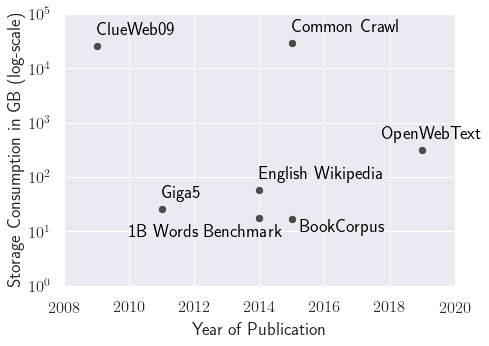

In [7]:
fig, ax = plt.subplots(figsize=(7, 5))
title = ''#'Text Datasets'
xlabel = 'Year of Publication'
ylabel = 'Storage Consumption in GB (log-scale)'

x = "year"
y = "size-gb"
name = "name"
df = storage_consumption_df
# Create the scatter plot
plot = sns.scatterplot(x, y, data=df, color="0.3", s=70, legend=False, ax=ax)
# Add text besides each point
for line in range(0, df.shape[0]):
     xoffset = 0.0
     yoffset = 0.2
     if line == 4:
         xoffset = +0.25
         yoffset = -0.25
     if line == 6:
        xoffset = -1.25
     if line == 2:
         xoffset = -4
         yoffset = -0.35  
     plot.text(df[x][line]+xoffset, df[y][line]+yoffset, 
               df[name][line], horizontalalignment='left', 
               size='medium', color='black')
# Set title and axis labels
plt.title(title, fontsize=20)
plt.xlabel(xlabel)
plt.ylabel(ylabel)  
plt.xlim(2008, 2020)
plt.ylim(0, 5)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$10^{x}$'.format(x=int(x))))
plt.savefig(save_path + "text-datasets-size.png", dpi=300)

In [29]:
one_b_word_benchmark = [2014, 17.48, "1B Words Benchmark"] # 4.7 * (4 byte for utf8) * 1000000000 / 1024 / 1024 / 1024 = 17.48
bookcorpus = [2015, 17.24, "BookCorpus"] # 4.7 (mean english word length) * 4 (byte for utf8) * 984846357 / 1024 / 1024 / 1024 = 17.24
giga5 = [2011, 26, "Giga5"] # 26 GB raw
clueweb = [2009, 25600, "ClueWeb09"] # 25 TB * 1024 = 25600 GB
commoncrawl = [2015, 29696, "Common Crawl"] # 29 TB * 1024 = 29696 GB
eng_wiki = [2014, 58, "English Wikipedia"] # 58 GB 
openwebtext = [2019, 12 ,"OpenWebText"] # 12GB raw text

caltech_101 = [2003, 0.13, "Caltech 101"] # 138,6 MB / 1024 = 0.13
caltech_256 = [2007, 1.5, "Caltech 256"] # 1.5GB 
cifar_10    = [2009, 0.18, "CIFAR-10"] # 186,2 MB / 1024 = 0.18
pascal_voc_2009 = [2009, 0.9, "Pascal VOC 2009"] # 920,5 MB / 1024 = 0.898 = 0.9 (http://host.robots.ox.ac.uk/pascal/VOC/voc2009/devkit_doc_14-May-2009.pdf)
pascal_voc_2012 = [2012, 2.0, "Pascal VOC 2012"] # 2GB
imagenet  = [2009, 1341.44, "ImageNet"] # 1.31 TB * 1024 = 1341.44 GB
tinyimage = [2008, 398, "TinyImage"] # 760GB (paper), but real
# Image binary (227Gb), Metadata binary (57Gb), Gist binary (114Gb) = 227 + 171 = 398
ms_coco = [2017, 46.14, "MS COCO"]
# 18GB + 1GB + 6GB + 19GB + 241MB + 1.1GB + 821MB + 5MB = 45.1 GB + 1067 MB = 45.1GB + 1.04 GB = 46.14 GB
openimages_v6 = [2020, 18432, "OpenImages V6"] # 18TB * 1024 = 18432

combined_list = []
combined_list.append(caltech_101)
combined_list.append(caltech_256)
combined_list.append(cifar_10)
combined_list.append(pascal_voc_2009)
combined_list.append(imagenet)
combined_list.append(tinyimage)
combined_list.append(pascal_voc_2012)
combined_list.append(ms_coco)
combined_list.append(openimages_v6)
combined_list.append(clueweb)
combined_list.append(giga5)
combined_list.append(one_b_word_benchmark)
combined_list.append(eng_wiki)
combined_list.append(bookcorpus)
combined_list.append(commoncrawl)
combined_list.append(openwebtext)
combined_np = np.array(combined_list)

concatinated_storage_consumption_df = pd.DataFrame(data=combined_np, \
            index=[i for i in range(combined_np.shape[0])], \
            columns=list(["year", "size-gb", "name"]))
for col_name in concatinated_storage_consumption_df.columns.values[:2]:
    concatinated_storage_consumption_df[col_name] = pd.to_numeric(concatinated_storage_consumption_df[col_name])
concatinated_storage_consumption_df.info()
concatinated_storage_consumption_df["log-size-gb"] = np.log10(concatinated_storage_consumption_df["size-gb"])
concatinated_storage_consumption_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     16 non-null     int64  
 1   size-gb  16 non-null     float64
 2   name     16 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 512.0+ bytes


,year,size-gb,name,log-size-gb
0,2003,0.13,Caltech 101,-0.886057
1,2007,1.50,Caltech 256,0.176091
2,2009,0.18,CIFAR-10,-0.744727
3,2009,0.90,Pascal VOC 2009,-0.045757
4,2009,1341.44,ImageNet,3.127571
5,2008,398.00,TinyImage,2.599883
6,2012,2.00,Pascal VOC 2012,0.301030
7,2017,46.14,MS COCO,1.664078
8,2020,18432.00,OpenImages V6,4.265572
9,2009,25600.00,ClueWeb09,4.408240


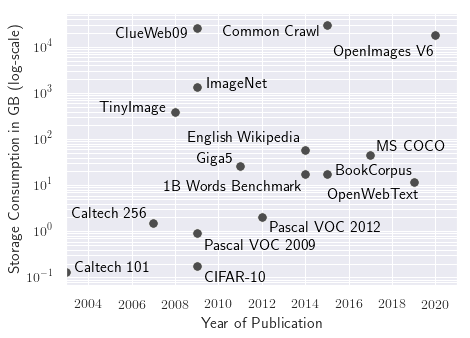

In [124]:
fig, ax = plt.subplots(figsize=(7, 5))
title = ''#'Text Datasets'
xlabel = 'Year of Publication'
ylabel = 'Storage Consumption in GB (log-scale)'



x = "year"
y = "size-gb"
name = "name"
df = concatinated_storage_consumption_df
# Create the scatter plot
plot = sns.scatterplot(x, y, data=df, color="0.3", s=90, legend=False, ax=ax)
# Add text besides each point
for line in range(0, df.shape[0]):
    xoffset = 0.0
    yoffset = 0.2
    if line == 0: # caltech 101
        xoffset = +0.4
        yoffset = 0.0
    if line == 1: # caltech 256
        xoffset = -3.75
        yoffset = +0.5
    if line == 2: # cifar-10
        xoffset = +0.4
        yoffset = -0.1
    if line == 3: # Pascal VOC 2009
        xoffset = +0.4
        yoffset = -0.5
    if line == 4: # Imagenet
        xoffset = +0.5
        yoffset = +0.5
    if line == 6: # Pascal VOC 2012
        xoffset = +0.4
        yoffset = -1
    if line == 5: # TinyImage
        xoffset = -3.5
        yoffset = 0.5
    if line == 7: # MS COCO
        xoffset = +0.3
        yoffset = +10
    if line == 8: # OpenImages
        xoffset = -4.7
        yoffset = -12000
    if line == 9: # ClueWeb
        xoffset = -3.7
        yoffset = -10000
    if line == 10: # Giga
        xoffset = -2
        yoffset = +5
    if line == 11: # 1B Words Benchmark
        xoffset = -6.5
        yoffset = -10
    if line == 12: # English wiki
        xoffset = -5.4
        yoffset = 30
    if line == 13: # BookCorpus
        xoffset = 0.4
        yoffset = 0.0
    if line == 14: # Common Crawl
        xoffset = -4.8
        yoffset = -12000
    if line == 15: # OpenWebText
        xoffset = -4
        yoffset = -7
    plot.text(df[x][line]+xoffset, df[y][line]+yoffset, 
              df[name][line], horizontalalignment='left', 
              size='medium', color='black')
# Set title and axis labels
plt.title(title, fontsize=20)
plt.xlabel(xlabel)
plt.ylabel(ylabel)  
plt.xlim(2003, 2021)
#plt.ylim(-1, 5)
ax.set_yscale('log')
plt.grid(True, which="minor",c='#FFFFFF') 
#ax.set(yscale="log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$10^{' + str(int(x)) + '}$'))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(list(str(x))[:-2]) ))
plt.savefig(save_path + "all-datasets-size.png", dpi=300)

In [4]:
## Throughput plot for GPUs
combined_info = {
    "name": []
   ,"throughput": []
}

def add_to_combined_info(info_list):
    name = info_list[0]
    throughput = info_list[1]
    combined_info["name"] += [name]
    combined_info["throughput"] += [throughput]

t4 = ["T4"    , 452]
a10 = ["A10"   , 996]
a30 = ["A30"   , 1339]
v100 = ["V100"  , 1393]
a100 = ["A100"  , 2662]
eight_t4 = ["8xT4"  , 3416]
eight_a10 = ["8xA10" , 7283]
eight_a30 = ["8xA30" , 9798]
eight_v100 = ["8xV100", 10479]
eight_a100 = ["8xA100", 20478]
tpuv3 = ["TPUv3", 1050000]

add_to_combined_info(t4)
add_to_combined_info(a10)
add_to_combined_info(a30)
add_to_combined_info(v100)
add_to_combined_info(a100)
add_to_combined_info(eight_t4)
add_to_combined_info(eight_a10)
add_to_combined_info(eight_a30)
add_to_combined_info(eight_v100)
add_to_combined_info(eight_a100)
add_to_combined_info(tpuv3)

gpu_info_df = pd.DataFrame.from_dict(combined_info)
gpu_info_df["throughput"] = pd.to_numeric(gpu_info_df["throughput"])
gpu_info_df["log_throughput"] = np.log10(gpu_info_df["throughput"])

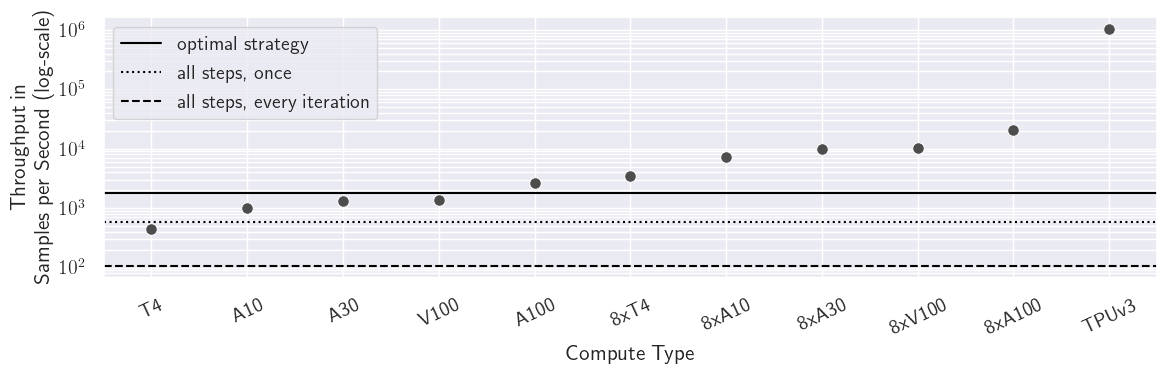

In [6]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(figsize=(12, 4))
title = ''#'Text Datasets'
xlabel = 'Compute Type'
ylabel = 'Throughput in\nSamples per Second (log-scale)'

x = "name"
y = "throughput"
df = gpu_info_df
# Create the scatter plot
plot = sns.scatterplot(x, y, data=df, color="0.3", s=70, legend=False, ax=ax)
plot.set_xticklabels(
        df["name"].to_numpy(), 
        rotation=25
)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.ylim(-1, 5)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$10^{' + str(x) + '}$'))

full_online = 107 #np.log10(588)
full_offline = 576 #np.log10(798)
our_throughput = 1789 #np.log10(2123)
plot.axhline(full_online, color="black", linestyle='--')
plot.axhline(full_offline, color="black", linestyle=':')
plot.axhline(our_throughput, color="black")

#plot.text(2.3, 3.8, "until-resize", horizontalalignment='left', size='medium', color='black', rotation=25)
l1 = mlines.Line2D([], [], color='black', linestyle='--', markersize=15, label='all steps, every iteration')
l2 = mlines.Line2D([], [], color='black', linestyle=':', markersize=15, label='all steps, once')
l3 = mlines.Line2D([], [], color='black', markersize=15, label='optimal strategy')
plt.legend(handles=[l3, l2, l1], frameon=True)#, facecolor="white")
ax.set_yscale('log')

plt.grid(True, which="minor",c='#FFFFFF')
plt.tight_layout()
plt.savefig(save_path + "gpu-comparison-resnet.png", dpi=300)

# Type Pipeline Analysis

In [1]:
%load_ext autoreload
%autoreload 2
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import ticker
import matplotlib.patches as mpatches

from typing import List
# adding previous directory for easier use of library
import sys
sys.path.append('../')
from notebookhelper import show_values_on_bars, show_values_on_catplot, save_figure, make_big_number_prettier \
                         , make_big_number_prettier_storage_mb

from presto.analysis import StrategyAnalysis \
                       , strat_analysis_from_csv

pd.set_option('display.max_rows', 200)
plotting_context = "paper"
default_palette = "colorblind"
epoch_palette = sns.color_palette("YlOrRd", 3)
samples_palette = sns.color_palette("icefire", 15)
threads_palette = sns.color_palette("tab20", 4)
font_scale = 1.4
sns.set(font_scale=font_scale, context=plotting_context)
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

## FLOAT32 - 2000 samples, [800,768] shape, size 2.45MB

In [15]:
local_fig_dir = "type-pipeline"

def save_fig(name, file_type='pdf'):
    save_figure(name, local_fig_dir=local_fig_dir, file_type=file_type)

home_path = "../logs/misc-logs/"
path_to_cum_df = f"{home_path}/type-float32_2021-10-14-20:51:06_cum-df_samples-2000_threads-8.csv"
path_to_cum_dstat_df = f"{home_path}/type-float32_2021-10-14-20:51:06_cum-dstat-df_samples-2000_threads-8.csv"
sampling_tag = ""

analysis = strat_analysis_from_csv(path_to_cum_dstat_df = path_to_cum_dstat_df
                                   , path_to_cum_df = path_to_cum_df)
cum_dstat_df = analysis.to_cum_dstat_df()
cum_df       = analysis.to_cum_df()
# need to sort the strategies for some reason as they are not ascending
cum_df = cum_df.sort_values(by='split_name')
strategies   = list(cum_df.split_name.unique())
strategies_renamed = ["read-dataset"]
print(strategies)

['1-create-dataset']


In [24]:
cum_df['shard_cum_size_MB'] / 2000

0    2.45784
Name: shard_cum_size_MB, dtype: float32

In [17]:
run = 0
threads = 8
sample_count = 2000

def extract_online_processing_frames(split_name):
    '''
    '''    
    
    max_offline_processing_time_s = cum_df.query(
        f"split_name=='{split_name}' and \
          runs_count=={run} and \
          thread_count=={threads} and \
          sample_count=={sample_count}")["offline_processing_and_save_time_s"].max()
    
    filtered_dstat_df = cum_dstat_df.query(
        f"split_name=='{split_name}' and \
          run=={run} and \
          thread_count=={threads} and \
          rel_time_s>={max_offline_processing_time_s}")
    
    return filtered_dstat_df

split_names = cum_df.split_name.unique()
frames = [extract_online_processing_frames(split_name=split_name) for split_name in split_names]
online_df = pd.concat(frames)

for split_name in cum_df.split_name.unique():
    
    avg_online_processing_time = cum_df.query(
        f"split_name=='{split_name}' and \
          runs_count=={run} and \
          thread_count=={threads} and \
          sample_count=={sample_count}")["online_processing_time_s"].describe().iloc[1]
    
    
    print("---------------------------------------")
    print(f"-- {split_name} Network Read in MB/s --")
    print(f"-- {split_name} Online Processing time: {int(avg_online_processing_time)}")
    
    temp_df = online_df.query(f"split_name=='{split_name}'")
    print(temp_df.describe()["net_read_mbs"])

---------------------------------------
-- 1-create-dataset Network Read in MB/s --
-- 1-create-dataset Online Processing time: 7
count      8.000000
mean     125.508553
std      218.491028
min        0.000180
25%        0.000180
50%        0.002564
75%      151.032133
max      495.308502
Name: net_read_mbs, dtype: float64


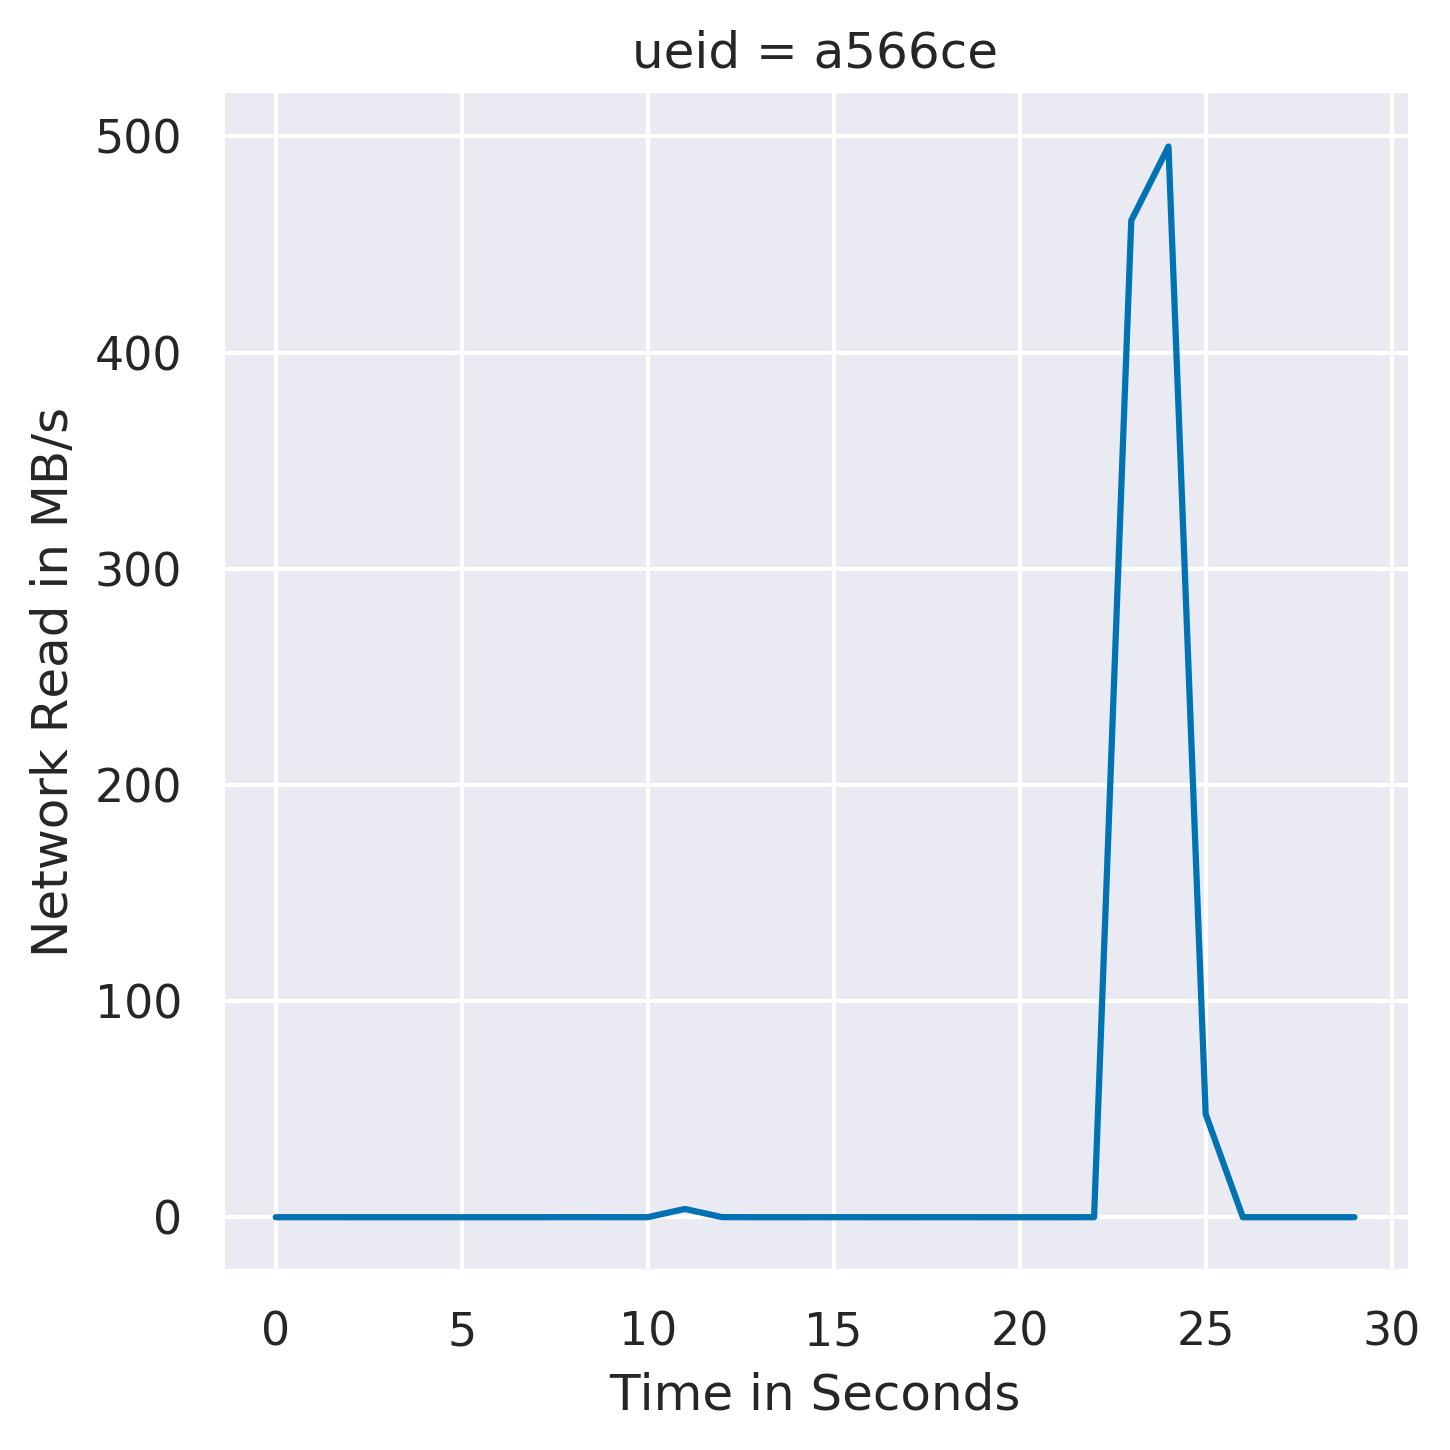

In [18]:
sns.set(palette=default_palette)

plot = sns.relplot(
    x="rel_time_s",
    y="net_read_mbs",
    kind="line",
    col="ueid",
    data=cum_dstat_df,
    ci=95
)
plot.set(xlabel="Time in Seconds", ylabel="Network Read in MB/s")
#plot.set(ylim=(0, 1200))
#plot.axhline(1100, color="black")
#plot.legend(strategies_renamed, title="Strategy", loc="upper right", ncol=1,labelspacing=0.10)
#save_fig("network-read-speed-t8-full", file_type="png")

## UInt8 - 8000 samples, [800,768] shape, size 2.45MB

In [19]:
local_fig_dir = "type-pipeline"

def save_fig(name, file_type='pdf'):
    save_figure(name, local_fig_dir=local_fig_dir, file_type=file_type)

home_path = "../logs/misc-logs/"
path_to_cum_df = f"{home_path}/type-uint8_2021-10-14-21:03:10_cum-df_samples-8000_threads-8.csv"
path_to_cum_dstat_df = f"{home_path}/type-uint8_2021-10-14-21:03:10_cum-dstat-df_samples-8000_threads-8.csv"
sampling_tag = ""

analysis = strat_analysis_from_csv(path_to_cum_dstat_df = path_to_cum_dstat_df
                                   , path_to_cum_df = path_to_cum_df)
cum_dstat_df = analysis.to_cum_dstat_df()
cum_df       = analysis.to_cum_df()
# need to sort the strategies for some reason as they are not ascending
cum_df = cum_df.sort_values(by='split_name')
strategies   = list(cum_df.split_name.unique())
strategies_renamed = ["read-dataset"]
print(strategies)

['1-create-dataset']


In [25]:
cum_df

,offline_processing_and_save_time_s,shard_count,thread_count,shard_cum_size_MB,sample_count,online_processing_time_s,throughput_sps,runs_count,runs_total,ueid,split_name,creation_timestamp,compression_type,storage_type
0,23.422836,8,8,4915.680176,8000,7.810133,1024.310303,0,1,1cef7e,1-create-dataset,2021-10-14-21:03:10,none,ceph-hdd


In [26]:
cum_df["shard_cum_size_MB"] / 8000

0    0.61446
Name: shard_cum_size_MB, dtype: float32

In [21]:
run = 0
threads = 8
sample_count = 8000

def extract_online_processing_frames(split_name):
    '''
    '''    
    
    max_offline_processing_time_s = cum_df.query(
        f"split_name=='{split_name}' and \
          runs_count=={run} and \
          thread_count=={threads} and \
          sample_count=={sample_count}")["offline_processing_and_save_time_s"].max()
    
    filtered_dstat_df = cum_dstat_df.query(
        f"split_name=='{split_name}' and \
          run=={run} and \
          thread_count=={threads} and \
          rel_time_s>={max_offline_processing_time_s}")
    
    return filtered_dstat_df

split_names = cum_df.split_name.unique()
frames = [extract_online_processing_frames(split_name=split_name) for split_name in split_names]
online_df = pd.concat(frames)

for split_name in cum_df.split_name.unique():
    
    avg_online_processing_time = cum_df.query(
        f"split_name=='{split_name}' and \
          runs_count=={run} and \
          thread_count=={threads} and \
          sample_count=={sample_count}")["online_processing_time_s"].describe().iloc[1]
    
    
    print("---------------------------------------")
    print(f"-- {split_name} Network Read in MB/s --")
    print(f"-- {split_name} Online Processing time: {int(avg_online_processing_time)}")
    
    temp_df = online_df.query(f"split_name=='{split_name}'")
    print(temp_df.describe()["net_read_mbs"])

---------------------------------------
-- 1-create-dataset Network Read in MB/s --
-- 1-create-dataset Online Processing time: 7
count      8.000000
mean      68.003410
std      138.991379
min        0.000180
25%        0.000236
50%        0.001175
75%       40.480566
max      382.120392
Name: net_read_mbs, dtype: float64


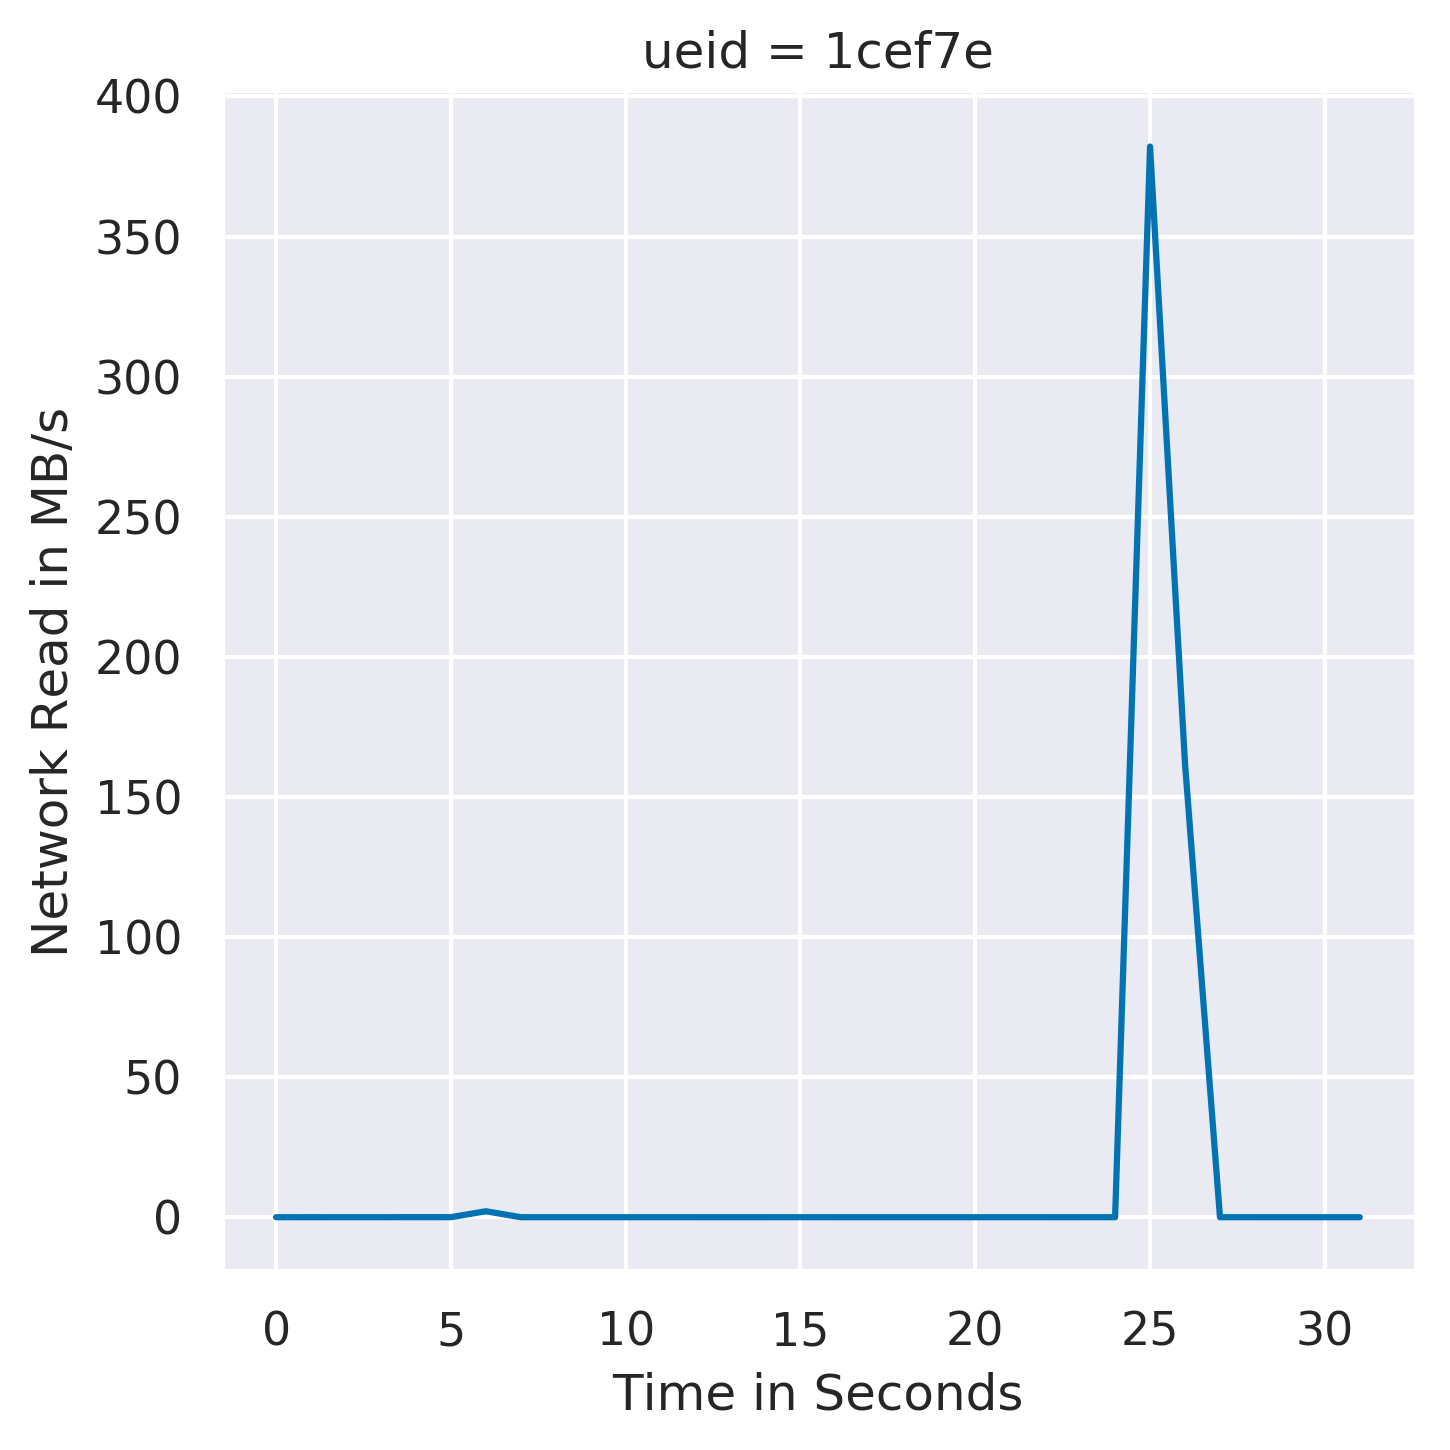

In [22]:
sns.set(palette=default_palette)

plot = sns.relplot(
    x="rel_time_s",
    y="net_read_mbs",
    kind="line",
    col="ueid",
    data=cum_dstat_df,
    ci=95
)
plot.set(xlabel="Time in Seconds", ylabel="Network Read in MB/s")
#plot.set(ylim=(0, 1200))
#plot.axhline(1100, color="black")
#plot.legend(strategies_renamed, title="Strategy", loc="upper right", ncol=1,labelspacing=0.10)
#save_fig("network-read-speed-t8-full", file_type="png")

## UInt8 - 2000 samples, [3200,768] shape, size 2.45MB

In [37]:
local_fig_dir = "type-pipeline"

def save_fig(name, file_type='pdf'):
    save_figure(name, local_fig_dir=local_fig_dir, file_type=file_type)

home_path = "../logs/misc-logs/"
path_to_cum_df = f"{home_path}/type-uint8_2021-10-14-22:22:52_cum-df_samples-2000_threads-8.csv"
path_to_cum_dstat_df = f"{home_path}/type-uint8_2021-10-14-22:22:52_cum-dstat-df_samples-2000_threads-8.csv"
sampling_tag = ""

analysis = strat_analysis_from_csv(path_to_cum_dstat_df = path_to_cum_dstat_df
                                   , path_to_cum_df = path_to_cum_df)
cum_dstat_df = analysis.to_cum_dstat_df()
cum_df       = analysis.to_cum_df()
# need to sort the strategies for some reason as they are not ascending
cum_df = cum_df.sort_values(by='split_name')
strategies   = list(cum_df.split_name.unique())
strategies_renamed = ["read-dataset"]
print(strategies)

['1-create-dataset']


In [38]:
cum_dstat_df

,rel_time_s,disk_read_mbs,disk_write_mbs,net_read_mbs,net_write_mbs,run,sample_count,shard_count,thread_count,ueid,...,vm_allocated_mb,vm_free_mb,filesystem_files,filesystem_inodes,filelocks_posix,filelocks_lock,filelocks_read,filelocks_write,compression_type,storage_type
0,0.0,0.024537,0.010369,0.000000,0.000000,0,2000,8,8,fec66f,...,0.03,0.03,1472.0,13815.0,3.0,2.0,0.0,5.0,none,ceph-hdd
1,1.0,2.916352,0.000000,0.011877,0.006163,0,2000,8,8,fec66f,...,0.38,0.00,1472.0,13825.0,3.0,2.0,0.0,5.0,none,ceph-hdd
2,2.0,0.004096,0.000000,0.000180,0.000000,0,2000,8,8,fec66f,...,0.49,0.00,1472.0,13825.0,3.0,2.0,0.0,5.0,none,ceph-hdd
3,3.0,7.856128,0.000000,0.001011,0.006720,0,2000,8,8,fec66f,...,0.37,1.20,1472.0,13825.0,3.0,2.0,0.0,5.0,none,ceph-hdd
4,4.0,0.000000,0.000000,0.032558,0.018396,0,2000,8,8,fec66f,...,0.17,0.04,1472.0,13826.0,3.0,2.0,0.0,5.0,none,ceph-hdd
5,5.0,0.008192,0.372736,0.013748,0.007448,0,2000,8,8,fec66f,...,0.18,0.03,1472.0,13822.0,3.0,2.0,0.0,5.0,none,ceph-hdd
6,6.0,0.000000,0.000000,2.513094,658.571533,0,2000,8,8,fec66f,...,0.16,0.04,1472.0,13916.0,3.0,2.0,0.0,5.0,none,ceph-hdd
7,7.0,0.000000,0.000000,0.013843,0.009103,0,2000,8,8,fec66f,...,0.17,0.01,1472.0,13916.0,3.0,2.0,0.0,5.0,none,ceph-hdd
8,8.0,0.139264,0.000000,0.006742,0.003541,0,2000,8,8,fec66f,...,0.16,0.02,1472.0,13921.0,3.0,2.0,0.0,5.0,none,ceph-hdd
9,9.0,0.000000,0.000000,0.000381,0.000216,0,2000,8,8,fec66f,...,0.17,0.01,1472.0,13921.0,3.0,2.0,0.0,5.0,none,ceph-hdd


In [30]:
cum_df["shard_cum_size_MB"] / 2000

0    2.457666
Name: shard_cum_size_MB, dtype: float32

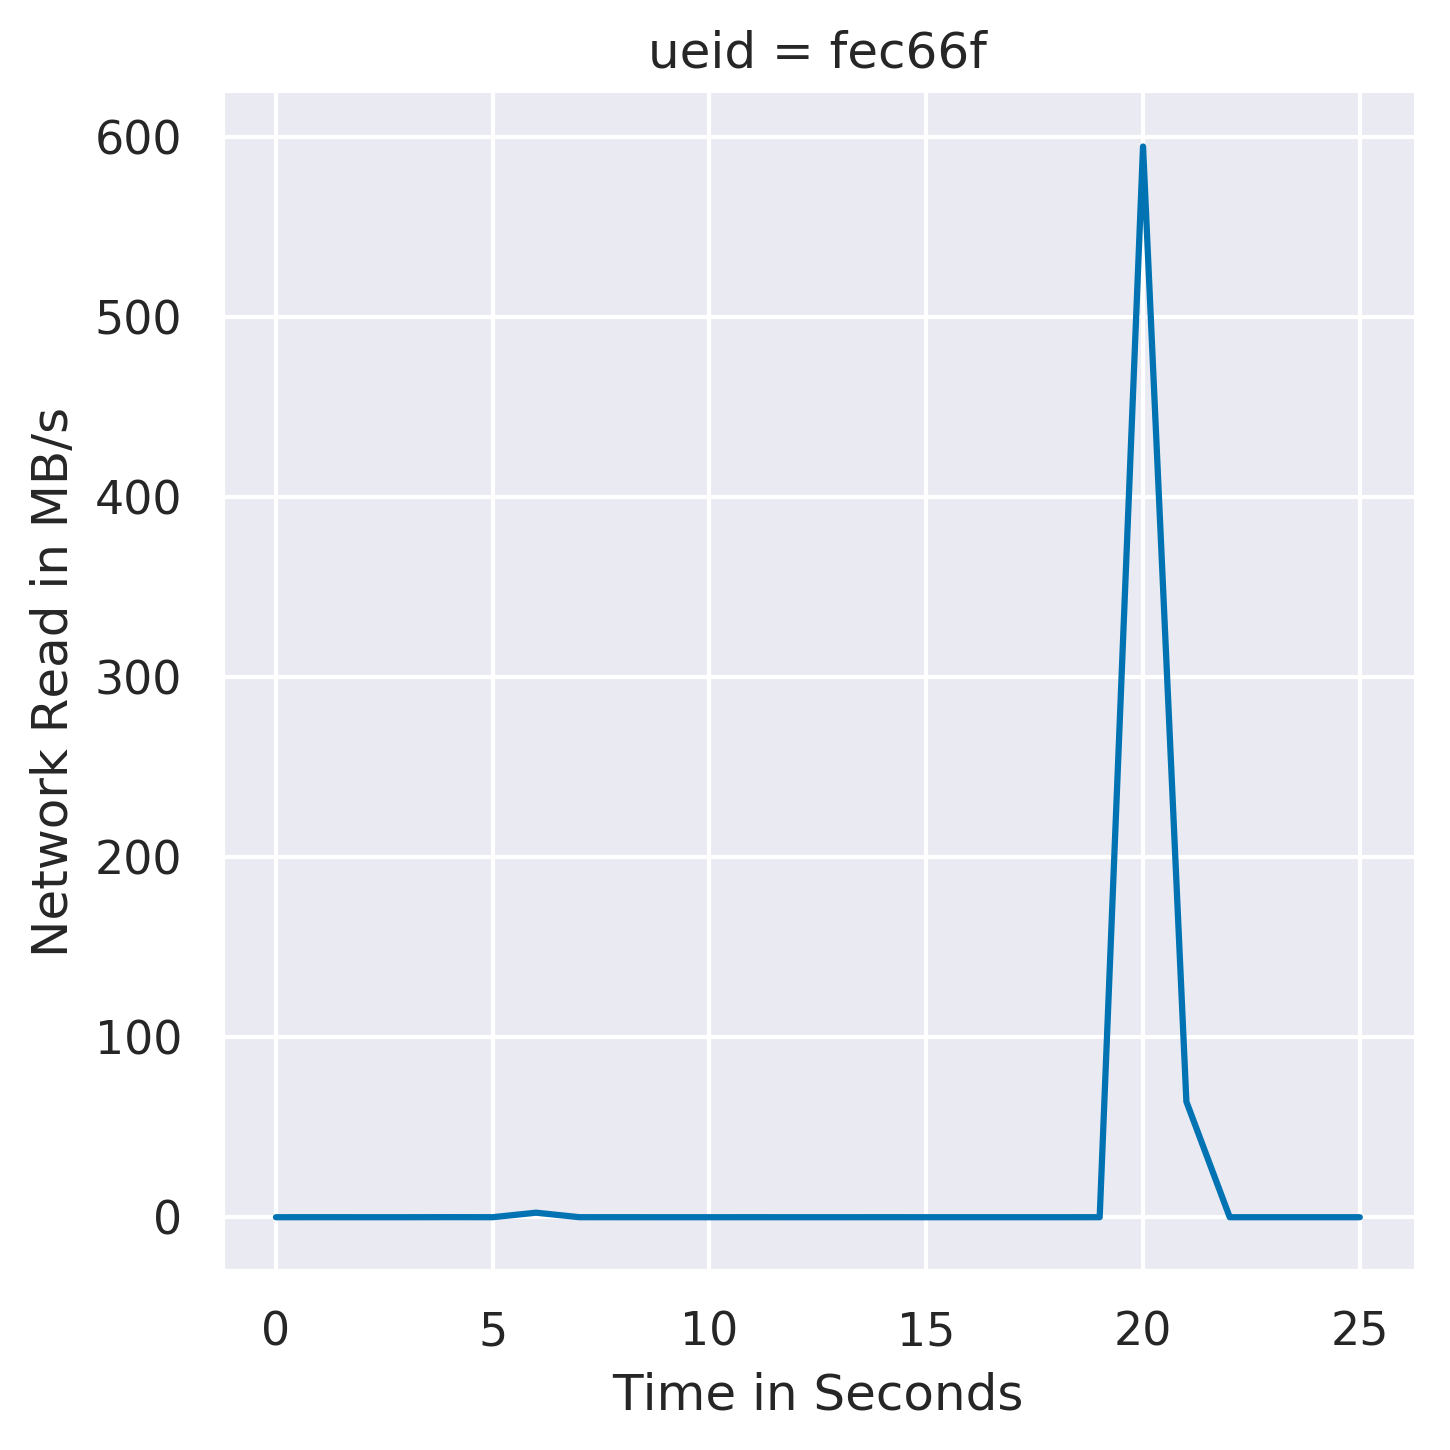

In [28]:
sns.set(palette=default_palette)

plot = sns.relplot(
    x="rel_time_s",
    y="net_read_mbs",
    kind="line",
    col="ueid",
    data=cum_dstat_df,
    ci=95
)
plot.set(xlabel="Time in Seconds", ylabel="Network Read in MB/s")
#plot.set(ylim=(0, 1200))
#plot.axhline(1100, color="black")
#plot.legend(strategies_renamed, title="Strategy", loc="upper right", ncol=1,labelspacing=0.10)
#save_fig("network-read-speed-t8-full", file_type="png")

## UInt8 - 378 samples, [5000,2703] shape, size 13MB

In [39]:
local_fig_dir = "type-pipeline"

def save_fig(name, file_type='pdf'):
    save_figure(name, local_fig_dir=local_fig_dir, file_type=file_type)

home_path = "../logs/misc-logs/"
path_to_cum_df = f"{home_path}/type-uint8_2021-10-14-23:03:18_cum-df_samples-378_threads-8.csv"
path_to_cum_dstat_df = f"{home_path}/type-uint8_2021-10-14-23:03:18_cum-dstat-df_samples-378_threads-8.csv"
sampling_tag = ""

analysis = strat_analysis_from_csv(path_to_cum_dstat_df = path_to_cum_dstat_df
                                   , path_to_cum_df = path_to_cum_df)
cum_dstat_df = analysis.to_cum_dstat_df()
cum_df       = analysis.to_cum_df()
# need to sort the strategies for some reason as they are not ascending
cum_df = cum_df.sort_values(by='split_name')
strategies   = list(cum_df.split_name.unique())
strategies_renamed = ["read-dataset"]
print(strategies)

['1-create-dataset']


In [40]:
cum_df["shard_cum_size_MB"] / 378

0    13.515066
Name: shard_cum_size_MB, dtype: float32

In [34]:
cum_df

,offline_processing_and_save_time_s,shard_count,thread_count,shard_cum_size_MB,sample_count,online_processing_time_s,throughput_sps,runs_count,runs_total,ueid,split_name,creation_timestamp,compression_type,storage_type
0,16.519327,8,8,5108.694824,378,6.299346,60.006226,0,1,13cf5b,1-create-dataset,2021-10-14-23:03:18,none,ceph-hdd


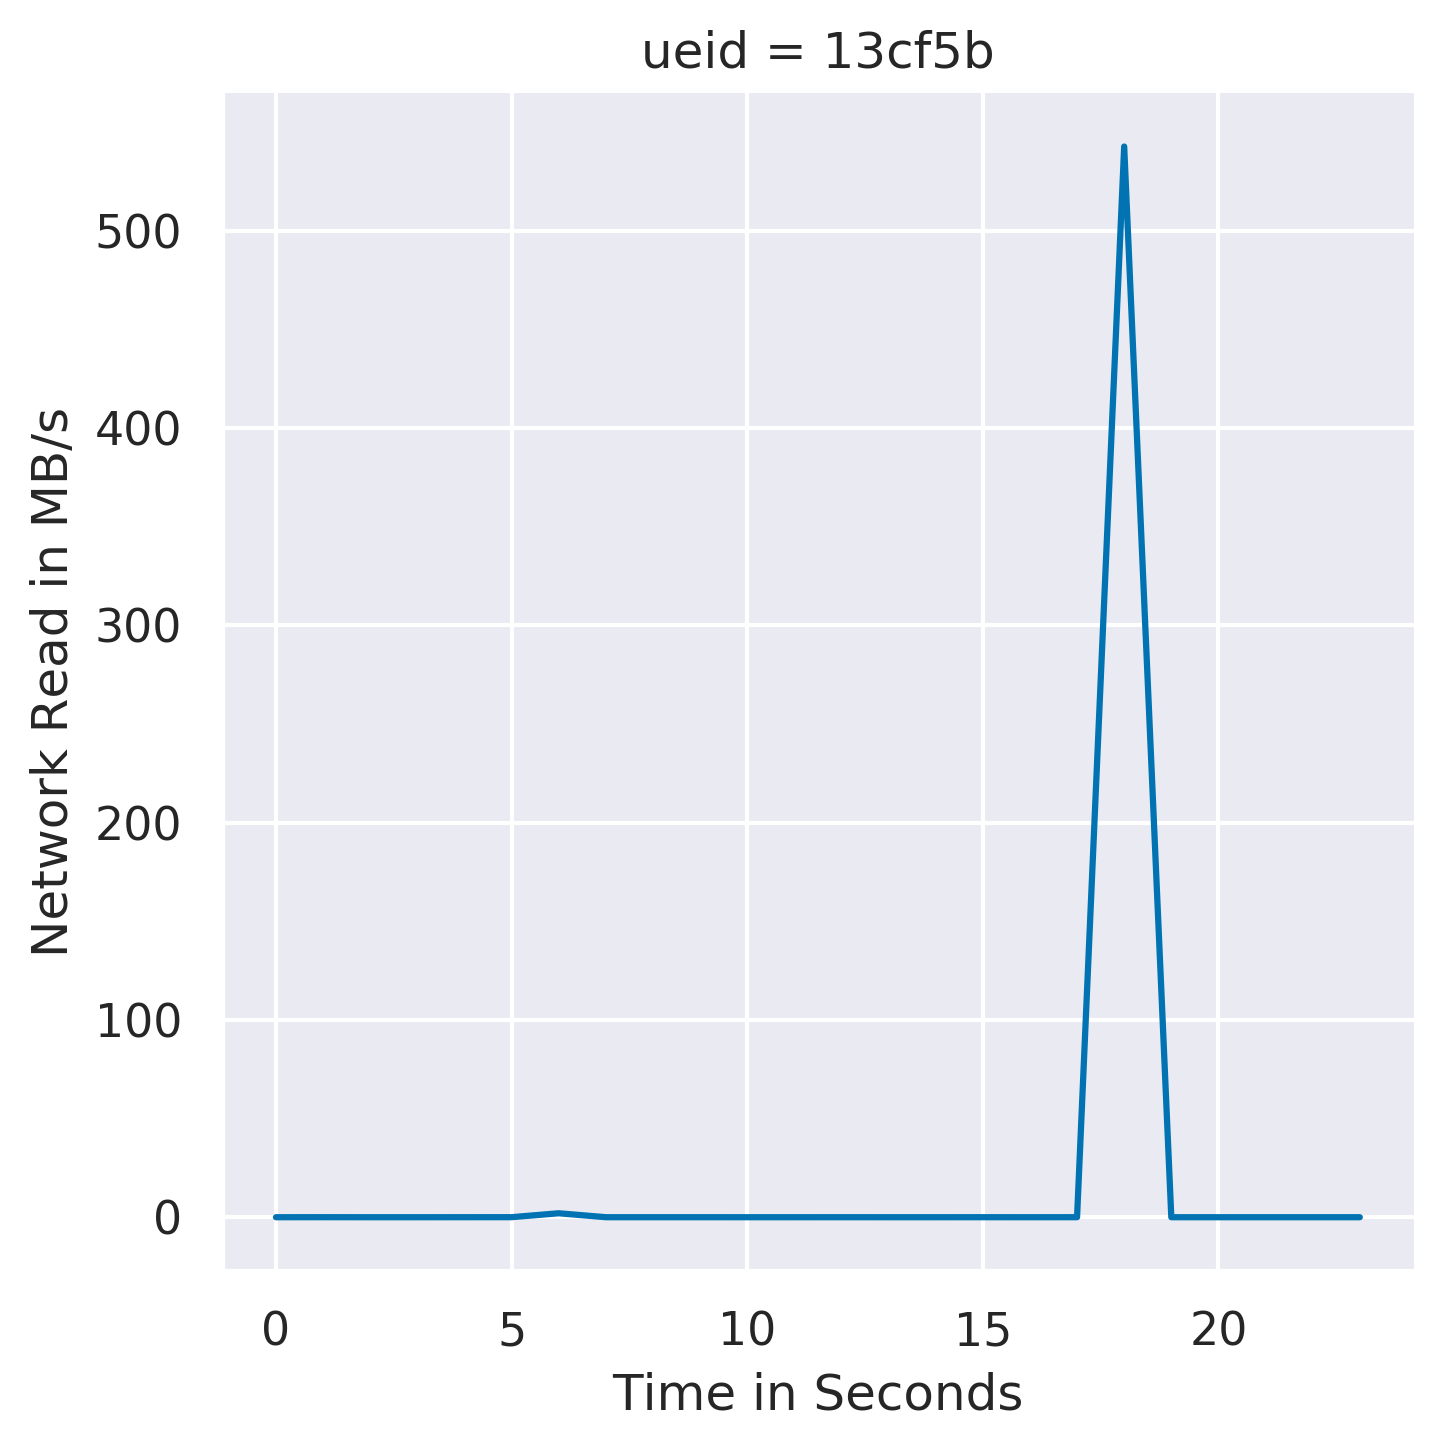

In [35]:
sns.set(palette=default_palette)

plot = sns.relplot(
    x="rel_time_s",
    y="net_read_mbs",
    kind="line",
    col="ueid",
    data=cum_dstat_df,
    ci=95
)
plot.set(xlabel="Time in Seconds", ylabel="Network Read in MB/s")
#plot.set(ylim=(0, 1200))
#plot.axhline(1100, color="black")
#plot.legend(strategies_renamed, title="Strategy", loc="upper right", ncol=1,labelspacing=0.10)
#save_fig("network-read-speed-t8-full", file_type="png")

In [36]:
cum_dstat_df

,rel_time_s,disk_read_mbs,disk_write_mbs,net_read_mbs,net_write_mbs,run,sample_count,shard_count,thread_count,ueid,...,vm_allocated_mb,vm_free_mb,filesystem_files,filesystem_inodes,filelocks_posix,filelocks_lock,filelocks_read,filelocks_write,compression_type,storage_type
0,0.0,0.024681,0.010360,0.000000,0.000000,0,378,8,8,13cf5b,...,0.03,0.03,1568.0,13815.0,3.0,2.0,0.0,5.0,none,ceph-hdd
1,1.0,3.563520,0.000000,0.012324,0.003707,0,378,8,8,13cf5b,...,0.40,0.00,1568.0,13831.0,3.0,2.0,0.0,5.0,none,ceph-hdd
2,2.0,0.008192,0.438272,0.000240,0.000000,0,378,8,8,13cf5b,...,0.48,0.00,1568.0,13831.0,3.0,2.0,0.0,5.0,none,ceph-hdd
3,3.0,2.686976,0.000000,0.000180,0.000000,0,378,8,8,13cf5b,...,0.38,1.07,1568.0,13831.0,3.0,2.0,0.0,5.0,none,ceph-hdd
4,4.0,4.571136,0.000000,0.008994,0.010976,0,378,8,8,13cf5b,...,0.27,0.22,1568.0,13831.0,3.0,2.0,0.0,5.0,none,ceph-hdd
5,5.0,0.000000,0.000000,0.017697,0.010848,0,378,8,8,13cf5b,...,0.25,0.11,1568.0,13832.0,3.0,2.0,0.0,5.0,none,ceph-hdd
6,6.0,0.000000,0.000000,2.000823,542.281311,0,378,8,8,13cf5b,...,0.19,0.07,1568.0,13920.0,3.0,2.0,0.0,5.0,none,ceph-hdd
7,7.0,0.000000,0.000000,0.006288,0.004444,0,378,8,8,13cf5b,...,0.19,0.06,1568.0,13920.0,3.0,2.0,0.0,5.0,none,ceph-hdd
8,8.0,0.000000,0.036864,0.006934,0.003682,0,378,8,8,13cf5b,...,0.19,0.06,1568.0,13920.0,3.0,2.0,0.0,5.0,none,ceph-hdd
9,9.0,0.000000,0.000000,0.006877,0.003691,0,378,8,8,13cf5b,...,0.19,0.04,1568.0,13920.0,3.0,2.0,0.0,5.0,none,ceph-hdd


## CV Network + Throughput Comparison with 